In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pip3 install seaborn
import seaborn as sns

df = pd.read_csv('salaries-2023.csv')
df = df.dropna()

df.head()
df.describe()

,level,years_of_experience,salary
count,760.000000,760.000000,760.000000
mean,2.203947,5.234211,2839.484211
std,0.718097,2.948462,2071.858144
min,1.000000,1.000000,670.000000
25%,2.000000,3.000000,1800.000000
50%,2.000000,5.000000,2500.000000
75%,3.000000,8.000000,3300.000000
max,3.000000,10.000000,30000.000000


In [146]:
df.shape

(760, 5)

In [147]:
df.language.value_counts()

language
php           217
js            181
.net          105
java           93
python         37
go             26
c++            24
node           19
kotlin         15
ruby           14
swift           6
rust            4
flutter         4
sql             2
sap             2
scala           2
salesforce      1
vue             1
blockchain      1
devops          1
progress        1
openedge        1
pascal          1
uipath          1
unity           1
Name: count, dtype: int64

In [148]:
allowed_languages = ['php', 'js', '.net', 'java']
df = df[df['language'].isin(allowed_languages)]
df.shape

(596, 5)

In [149]:
df.city.value_counts()

city
Vilnius                     337
Kaunas                      155
Klaipėda                     11
Vilniuje                      9
JAV                           9
UK                            8
Kaune                         7
Šiauliai                      7
Vokietija                     6
vilnius                       6
Klaipeda                      4
Danija                        4
VILNIUS                       3
Panevėžys                     2
kaunas                        2
Mažeikiai                     2
Norvegija                     2
Olandija                      2
Šveicarija                    2
Marijampole                   1
Prancūzija                    1
Rumsiskes                     1
Birštonas                     1
Jonava                        1
Klaipėdoje                    1
Pietų Afrikos Respublika      1
KAUNAS                        1
Baltarusija                   1
Siauliai                      1
VILNIUJE                      1
Suomija                       1
Pan

In [150]:
vilnius_names = ['Vilniuj', 'Vilniua', 'VILNIUJE', 'VILNIUS', 'vilnius', 'Vilniuje']
condition = df['city'].isin(vilnius_names)
df.loc[condition, 'city'] = 'Vilnius'

kaunas_names = ['KAUNAS', 'kaunas', 'Kaune']
condition = df['city'].isin(kaunas_names)
df.loc[condition, 'city'] = 'Kaunas'

df.city.value_counts()

city
Vilnius                     358
Kaunas                      165
Klaipėda                     11
JAV                           9
UK                            8
Šiauliai                      7
Vokietija                     6
Danija                        4
Klaipeda                      4
Norvegija                     2
Olandija                      2
Šveicarija                    2
Panevėžys                     2
Mažeikiai                     2
Birštonas                     1
Jonava                        1
Siauliai                      1
Pietų Afrikos Respublika      1
Baltarusija                   1
Prancūzija                    1
Marijampole                   1
Suomija                       1
Panevezys                     1
Alytus                        1
Tauragė                       1
Klaipėdoje                    1
Skandinavija                  1
Rumsiskes                     1
Name: count, dtype: int64

In [151]:
allowed_cities = ['Vilnius', 'Kaunas']
df = df[df['city'].isin(allowed_cities)]
df.shape

(523, 5)

In [152]:
df_sorted = df.sort_values(by='salary', ascending=False)
df_sorted.head(20)

,language,city,level,years_of_experience,salary
148,js,Vilnius,3,6,14000
702,js,Vilnius,3,7,8400
607,.net,Vilnius,3,10,8000
141,php,Vilnius,3,10,7500
733,php,Vilnius,3,9,7000
27,js,Vilnius,3,9,6000
304,php,Kaunas,3,9,5500
337,php,Vilnius,3,10,5500
736,js,Vilnius,3,10,5300
460,js,Vilnius,3,10,5261


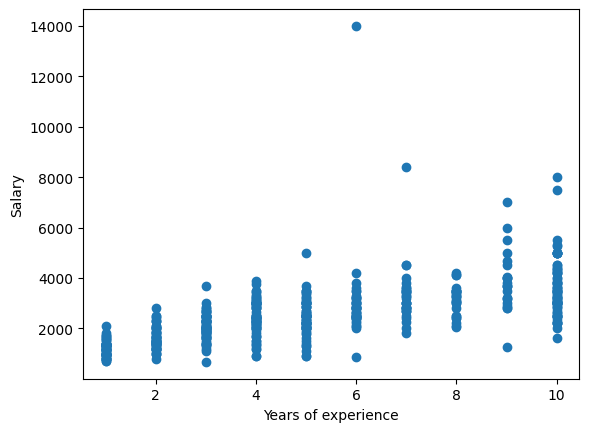

In [153]:
x = df.iloc[:, -2:-1]
y = df.iloc[:,-1].values   
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(x, y)

In [154]:
df = df[df['salary'] <= 6000]
df.shape

(518, 5)

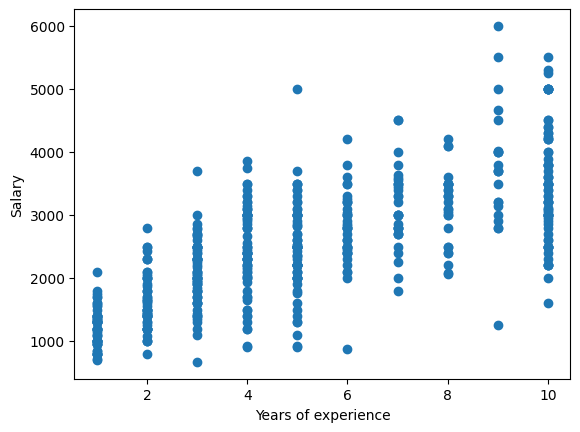

In [155]:
x = df.iloc[:, -2:-1]
y = df.iloc[:,-1].values   
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(x, y)

In [156]:
one_hot = pd.get_dummies(df['language'], prefix='lang') 
df = df.join(one_hot)
df = df.drop('language', axis=1)

one_hot = pd.get_dummies(df['city'], prefix='city') 
df = df.join(one_hot)
df = df.drop('city', axis=1)

df.head(10)

,level,years_of_experience,salary,lang_.net,lang_java,lang_js,lang_php,city_Kaunas,city_Vilnius
2,3,10,2800,False,False,False,True,False,True
3,3,10,3400,False,False,False,True,False,True
4,3,10,2500,False,True,False,False,False,True
5,2,4,2100,False,False,False,True,True,False
7,1,1,1181,True,False,False,False,False,True
8,3,8,3500,False,False,False,True,False,True
9,2,2,1800,True,False,False,False,True,False
10,1,5,1800,False,False,False,True,True,False
13,2,5,2700,False,False,False,True,False,True
15,2,10,2000,False,False,True,False,True,False


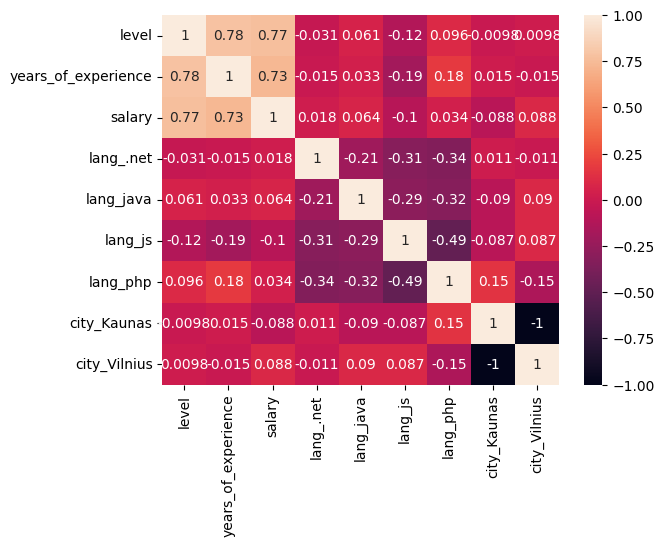

In [157]:
sns.heatmap(df.corr(), annot=True);

In [158]:
x = df.iloc[:,0:2].values  # get all rows with all columns except the last one
y = df.iloc[:,2].values   # get all rows with only the last column
x[0:5]

array([[ 3, 10],
       [ 3, 10],
       [ 3, 10],
       [ 2,  4],
       [ 1,  1]])

In [159]:
y[0:5]

array([2800, 3400, 2500, 2100, 1181])

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(414, 2)

In [161]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [162]:
model.fit(x_train, y_train)

LinearRegression()

In [163]:
y_pred = model.predict(x_test)
y_pred

array([1199.71172545, 3090.85570562, 1199.71172545, 2446.32022189,
       1199.71172545, 3191.20120774, 2245.62921766, 1199.71172545,
       2647.01122613, 2245.62921766, 2044.93821342, 1300.05722757,
       3592.58321622, 3191.20120774, 2145.28371554, 1199.71172545,
       2647.01122613, 3291.54670986, 3191.20120774, 2044.93821342,
       3391.89221198, 2044.93821342, 3191.20120774, 3090.85570562,
       1199.71172545, 3090.85570562, 3592.58321622, 1199.71172545,
       2245.62921766, 3592.58321622, 2145.28371554, 2145.28371554,
       3391.89221198, 1199.71172545, 3592.58321622, 2145.28371554,
       2145.28371554, 2245.62921766, 3592.58321622, 1400.40272969,
       2145.28371554, 2145.28371554, 3391.89221198, 3592.58321622,
       1944.5927113 , 2847.70223037, 1300.05722757, 1199.71172545,
       1199.71172545, 3492.2377141 , 1300.05722757, 1944.5927113 ,
       1300.05722757, 2446.32022189, 2245.62921766, 3592.58321622,
       1300.05722757, 2446.32022189, 2145.28371554, 1300.05722

In [164]:
salaries = model.predict([[3, 12], [1, 1]])
salaries

array([3793.27422045, 1199.71172545])

In [165]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)                           

print(f"R2 Score: {r2} ({r2:.2%})")

R2 Score: 0.6311227637903979 (63.11%)
